<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/220510_SD_in_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://www.transentis.com/simple-python-library-system-dynamics/en/
!pip install BPTK_Py

     |████████████████████████████████| 150 kB 5.1 MB/s 
     |████████████████████████████████| 149 kB 41.3 MB/s 
     |████████████████████████████████| 461 kB 54.3 MB/s 
     |████████████████████████████████| 48 kB 4.8 MB/s 
     |████████████████████████████████| 749 kB 31.8 MB/s 
  Created wheel for parsimonious: filename=parsimonious-0.9.0-py3-none-any.whl size=44314 sha256=4f20bfa9e4351416f49befbf6eb2098c9c677e95229621f3ae5be897de189e27
  Stored in directory: /root/.cache/pip/wheels/a4/54/88/c1ee7de0eabd1fb817cbf35824e4c2cba664d5816ddc64efb1
Successfully built parsimonious
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20


In [3]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

BPTK Server requires Python 3.9 or later. Please update Python to use the BPTK Server!


In [4]:
# Declare Model
model = Model(starttime=0,stoptime=120,dt=1,name='SimpleProjectManagament')

# Declare Stocks
openTasks = model.stock("openTasks")
closedTasks = model.stock("closedTasks")
staff = model.stock("staff")

# Declare Flows
completionRate = model.flow("completionRate")

# Declare Auxiliary Variables
currentTime = model.converter("currentTime")
remainingTime = model.converter("remainingTime")
schedulePressure = model.converter("schedulePressure")
productivity = model.converter("productivity")

# Declare COnstants 
deadline = model.constant("deadline")
effortPerTask = model.constant("effortPerTask")
initialStaff = model.constant("initialStaff")
initialOpenTasks = model.constant("initialOpenTasks")

In [12]:
# Initialize Stocks
closedTasks.initial_value = 0.0
staff.initial_value = initialStaff
openTasks.initial_value = initialOpenTasks

# Define Stocks 
openTasks.equation = -completionRate
closedTasks.equation = completionRate

# Define Flows
completionRate.equation = sd.max(0,
   sd.min(openTasks, 
      staff*(productivity/effortPerTask)
   )
)

# Define Constants
deadline.equation = 100.0 # Constants can only contain floating point values
effortPerTask.equation = 1.0
initialStaff.equation = 1.0
initialOpenTasks.equation = 100.0

# Track simulation time 
currentTime.equation=sd.time()

# Track remaining time
remainingTime.equation = deadline - currentTime

In [13]:
# Define converters through an equation - schedule pressure
schedulePressure.equation = sd.min(
   (openTasks*effortPerTask)/
   (staff*sd.max(remainingTime,1)),
   2.5
)

# Define converters through a value table - prodcutivity
model.points["productivity"] = [
    [0,0.4],
    [0.25,0.444],
    [0.5,0.506],
    [0.75,0.594],
    [1,1],
    [1.25,1.119],
    [1.5,1.1625],
    [1.75,1.2125],
    [2,1.2375],
    [2.25,1.245],
    [2.5,1.25]
]

productivity.equation = sd.lookup(schedulePressure,"productivity")

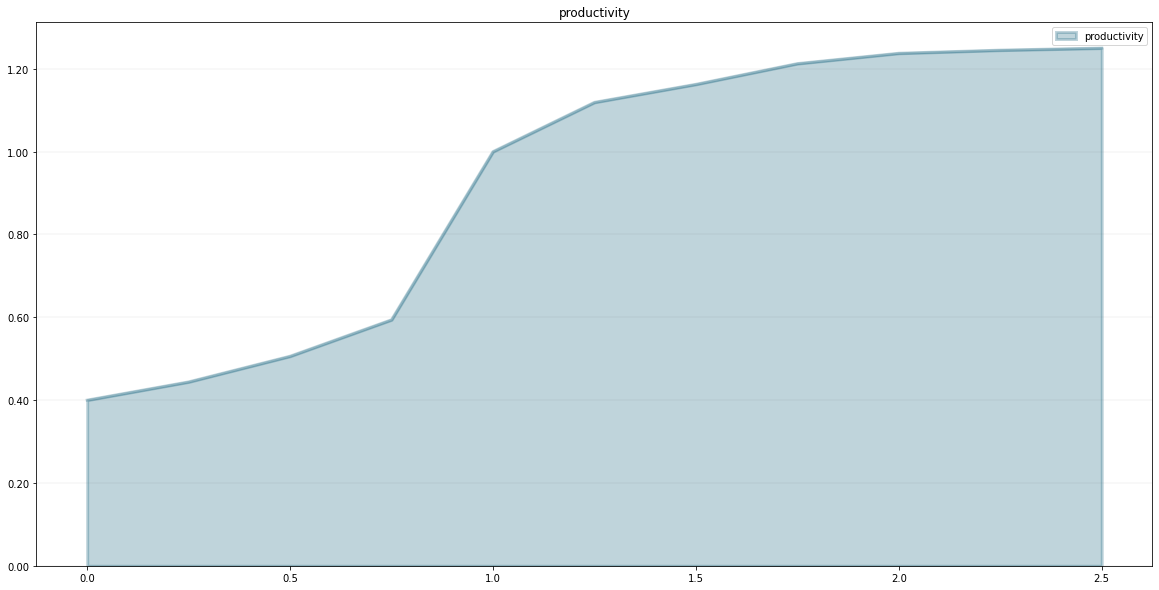

In [14]:
model.plot_lookup("productivity")

In [16]:
closedTasks(80), closedTasks(100), closedTasks(120)

(80.0, 100.0, 100.0)

In [18]:
deadline.equation = 120.0
closedTasks(80), closedTasks(100), closedTasks(120)

(63.33020661244643, 81.06644489208418, 99.99777243819346)

In [20]:
deadline.equation=80.0
closedTasks(80), closedTasks(100), closedTasks(120)

(92.6853060260874, 100.00000000000004, 100.00000000000004)

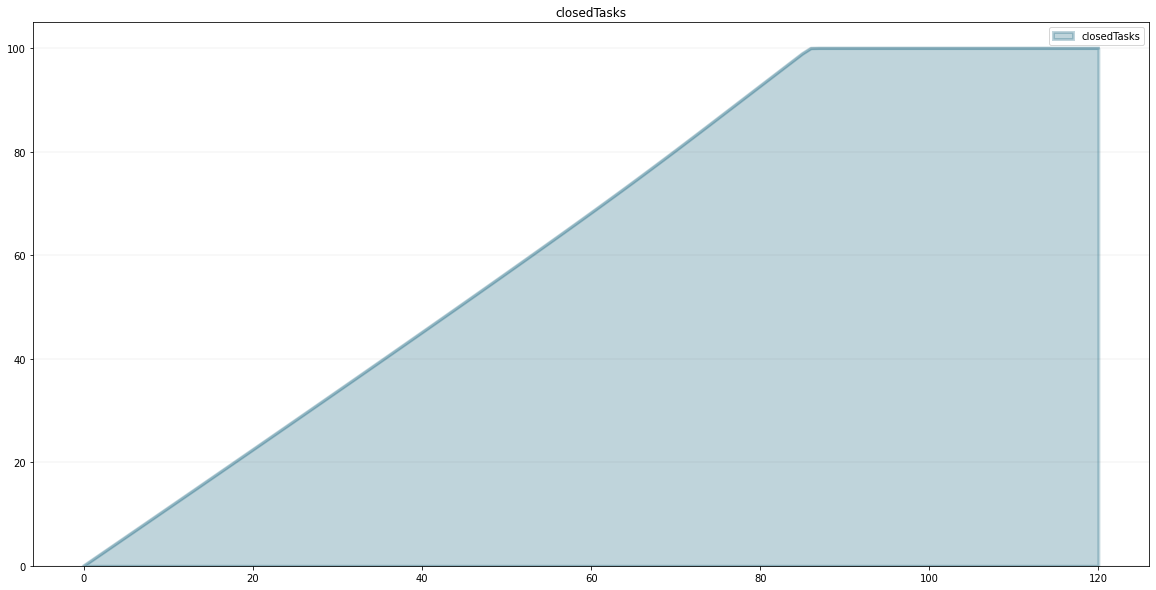

In [21]:
closedTasks.plot()

In [22]:
# Using Scenario Management
import BPTK_Py
bptk = BPTK_Py.bptk()

In [23]:
scenario_manager = {
    "smSimpleProjectManagementDSL":{
    
    "model": model,
    "base_constants": {
        "deadline": 100.0,
        "initialStaff": 1.0,
        "effortPerTask": 1.0,
        "initialOpenTasks": 100.0,

    },
    "base_points":{
            "productivity": [
                [0,0.4],
                [0.25,0.444],
                [0.5,0.506],
                [0.75,0.594],
                [1,1],
                [1.25,1.119],
                [1.5,1.1625],
                [1.75,1.2125],
                [2,1.2375],
                [2.25,1.245],
                [2.5,1.25]
            ]
    }
 }
}

In [24]:
# Registering Scenario Manager 
bptk.register_scenario_manager(scenario_manager)

In [25]:
bptk.register_scenarios(
    scenarios =
        {
            "scenario80": {
                "constants": {
                    "initialOpenTasks": 80
                }
            }
        }
    ,
    scenario_manager="smSimpleProjectManagementDSL")

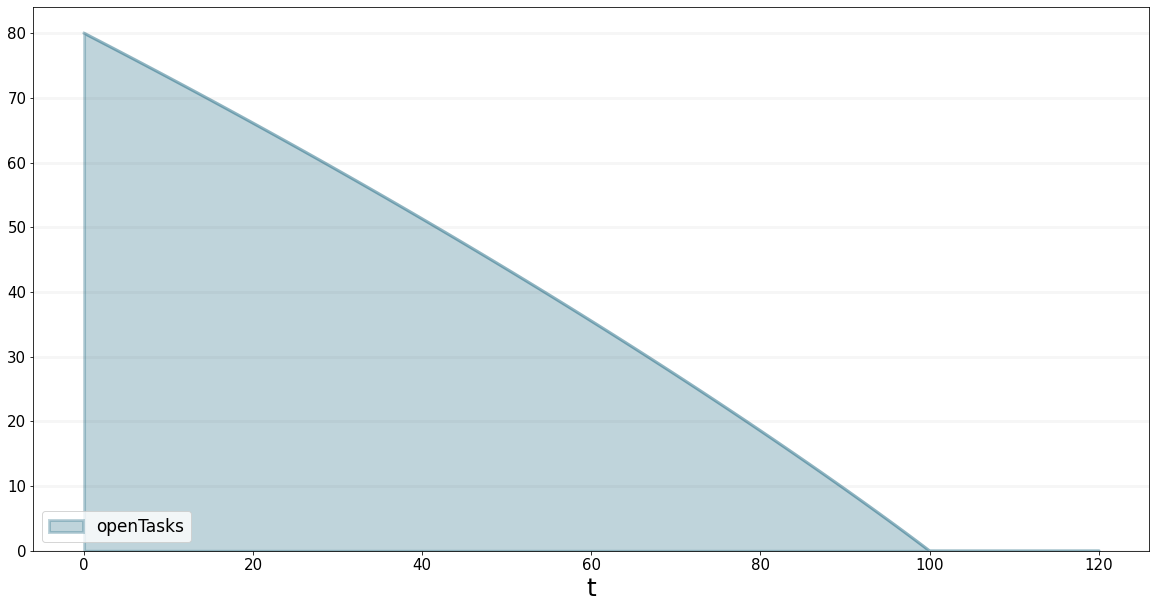

In [26]:
bptk.plot_scenarios(
    scenarios="scenario80",
    scenario_managers="smSimpleProjectManagementDSL",
    equations="openTasks")

In [27]:
bptk.register_scenarios(
    scenarios =
    {
         "scenario100": {
        
        },
        "scenario120": {
            "constants": {
                "initialOpenTasks" : 120
            }
        }
    },
    scenario_manager="smSimpleProjectManagementDSL")

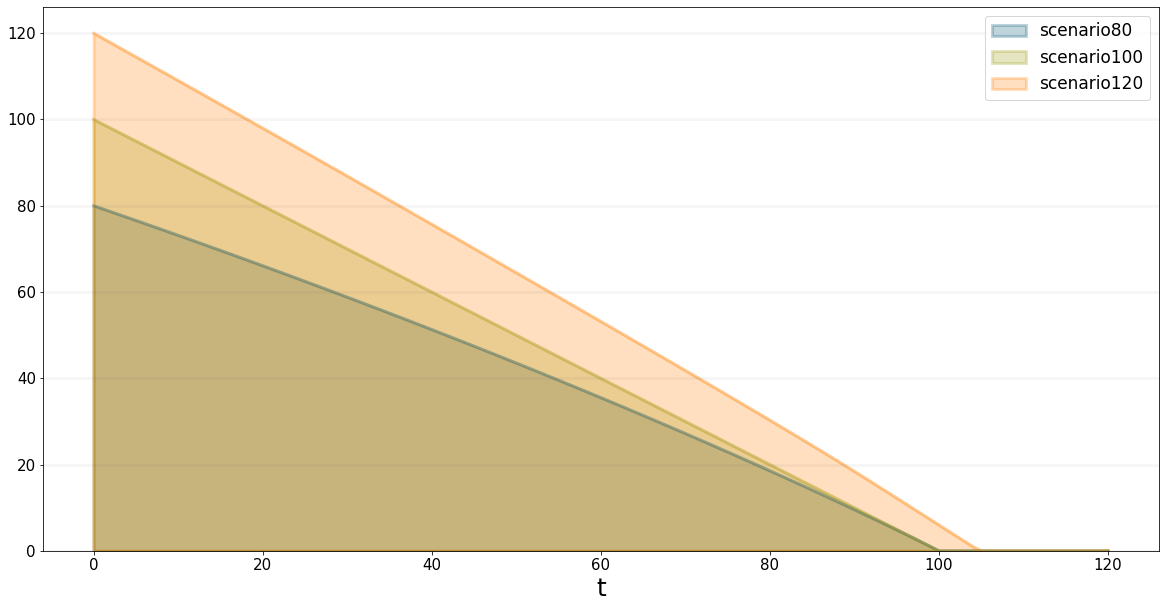

In [28]:
bptk.plot_scenarios(
    scenarios="scenario80,scenario100,scenario120",
    scenario_managers="smSimpleProjectManagementDSL",
    equations="openTasks",
    series_names={
        "smSimpleProjectManagementDSL_scenario80_openTasks":"scenario80",
        "smSimpleProjectManagementDSL_scenario100_openTasks":"scenario100",
        "smSimpleProjectManagementDSL_scenario120_openTasks":"scenario120"
    }
)

In [32]:
# trying to use Tkinter
!pip install tk
import tkinter